Solving for Cell Count = 31
0.03333333333333333


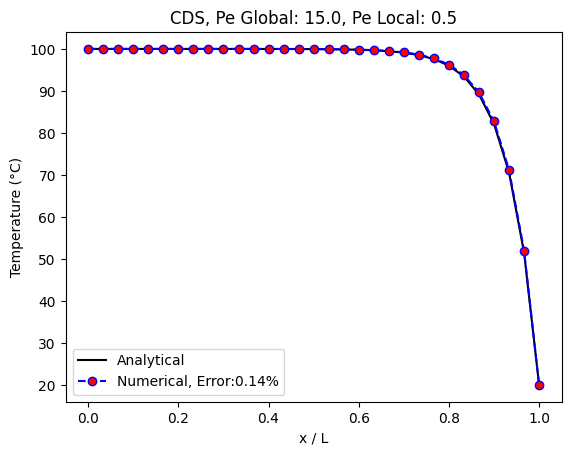

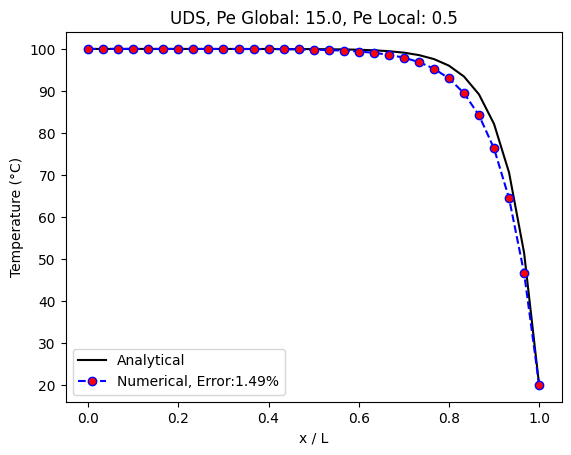

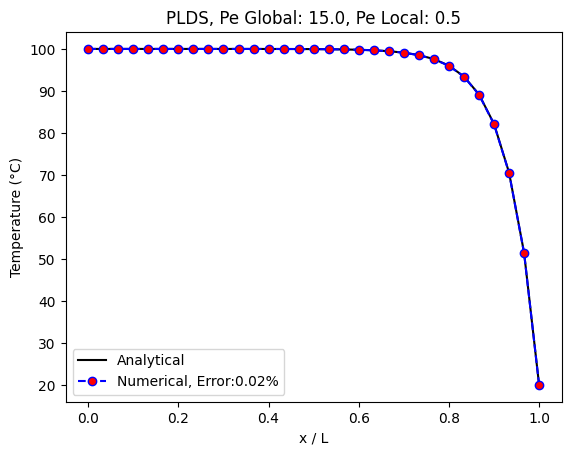

Solving for Cell Count = 11
0.1


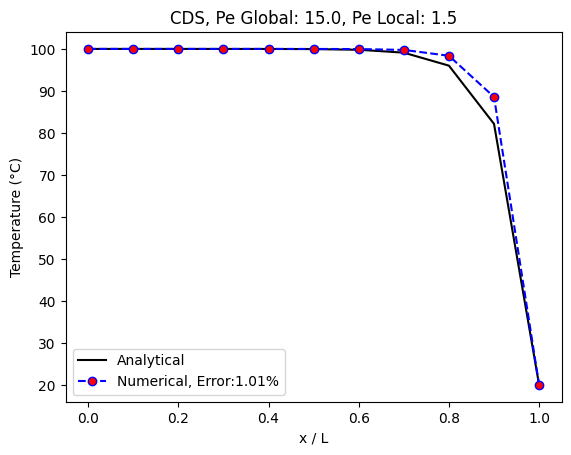

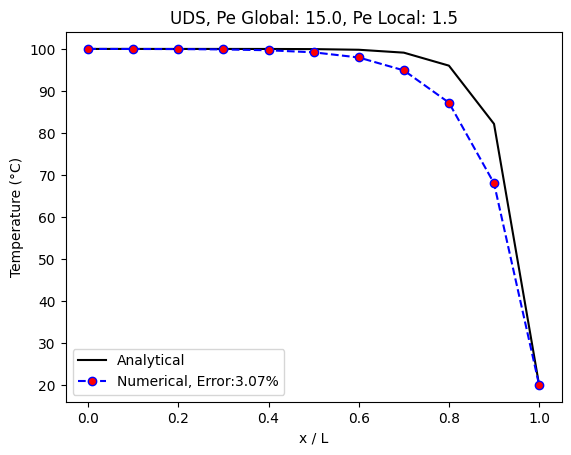

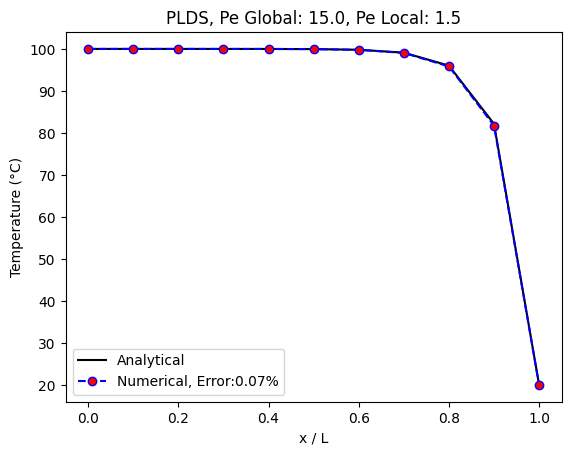

Solving for Cell Count = 7
0.16666666666666666


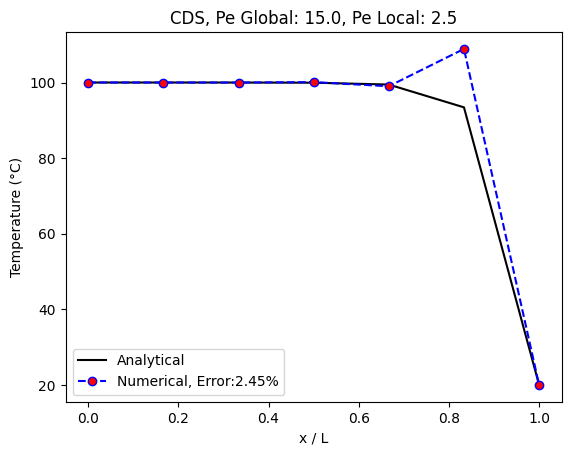

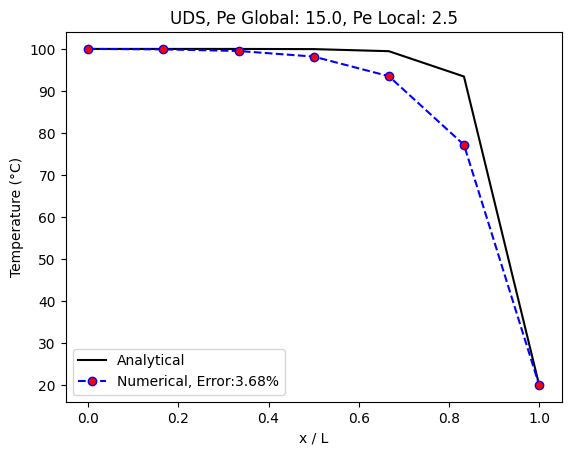

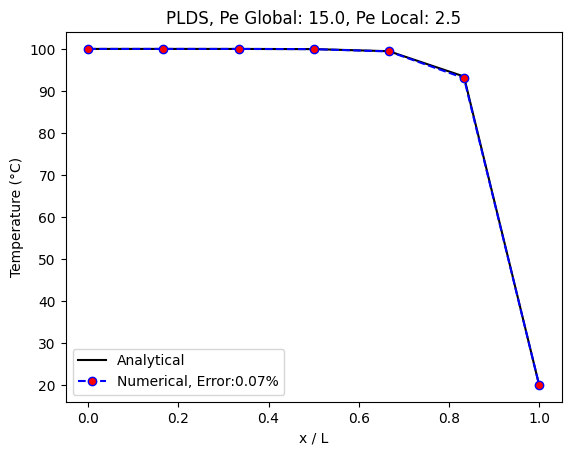

Solving for Cell Count = 4
0.3333333333333333


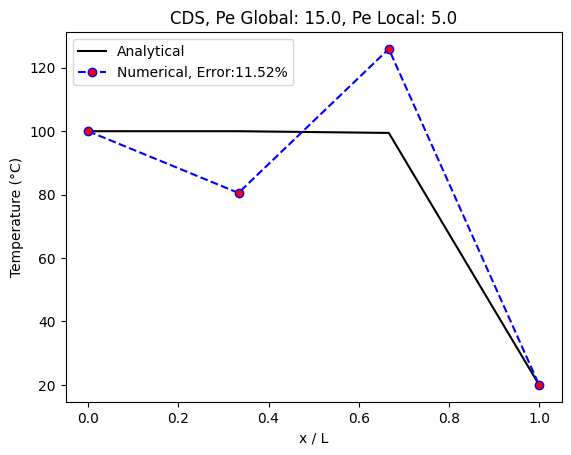

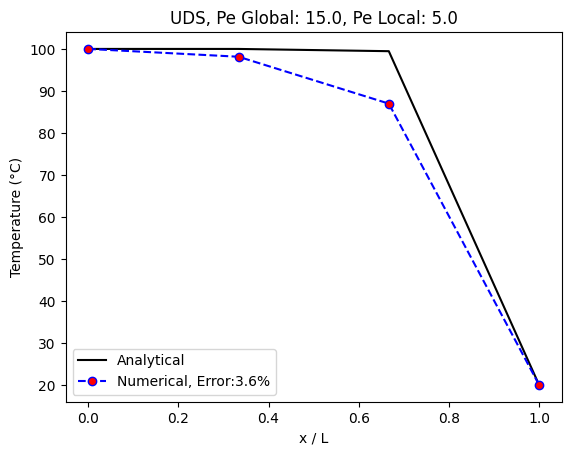

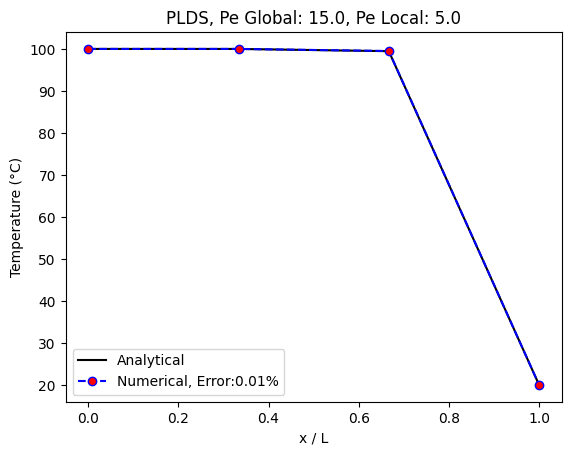

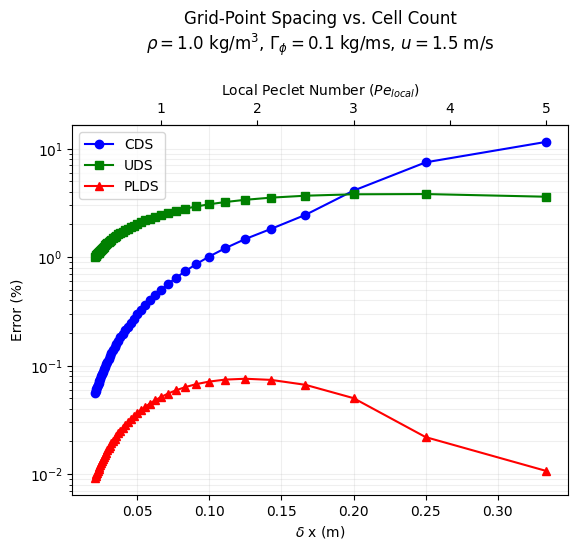

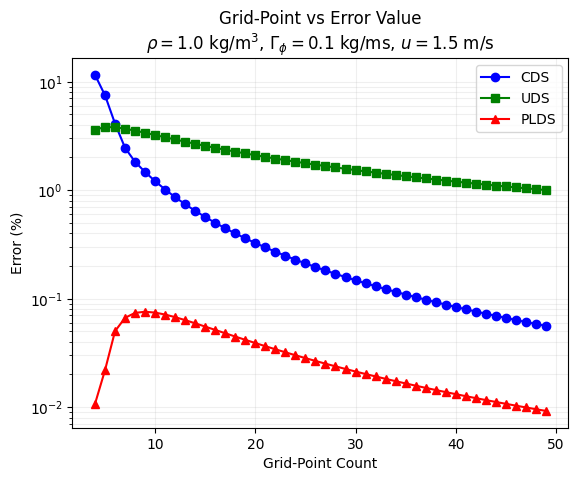

In [1]:
import numpy as np
from algorithm_and_tools import analytical, plotting, error_calc, error_dx, error_cell
from schemes import cds, uds, pds

def solve(length, cell_count, gamma_T, density, vel, T_West, T_East):
    # Domain setup
    delta_x = length / (cell_count - 1)
    x = np.linspace(0, length, cell_count) 
    Temp = np.full(cell_count, T_East) # deg C

    Pe_local = (density * vel * delta_x / gamma_T)
    Pe_global = (density * vel * length / gamma_T)
    T_analytical = analytical(x, length, Pe_global, T_West, T_East)
    results = {
        "CDS" : cds(cell_count, gamma_T, delta_x, density, vel, Temp, T_West, T_East), 
        "UDS" : uds(cell_count, gamma_T, delta_x, density, vel, Temp, T_West, T_East), 
        "PLDS" : pds(cell_count, gamma_T, delta_x, density, vel, Temp, T_West, T_East, Pe_local)
        }
    errors = {name: error_calc(cell_count, T_analytical, res) for name, res in results.items()}
    
    return delta_x, x, T_analytical, results, errors, Pe_local, Pe_global

L, rho, gamma_T, u, TW, TE = 1.0, 1.0, 0.1, 1.5, 100.0, 20.0

# Compare between schemes
cell_counts = [31, 11, 7, 4]
for N in cell_counts:
    print(f"Solving for Cell Count = {N}")
    dx, x, T_analytical, results, errors, Pe_L, Pe_G = solve(L, N, gamma_T, rho, u, TW, TE)
    print(dx)
    for name in results:
        plotting(x, T_analytical, f"{name}", results[name], errors[name], Pe_G, Pe_L)

# Comparing error values in each scheme for dx, cell count, and Pe
cell_count, err_cds, err_uds, err_pds, dx_list = [i for i in range(4,50,1)], [], [], [], []
for i in cell_count:
    dx, x, T_analytical, results, errors, Pe_L, Pe_G = solve(L, i, gamma_T, rho, u, TW, TE)
    dx_list.append(dx)
    err_cds.append(errors["CDS"])
    err_uds.append(errors["UDS"])
    err_pds.append(errors["PLDS"])

error_dx(dx_list, err_cds, err_uds, err_pds, u, gamma_T, rho)
error_cell(cell_count, err_cds, err_uds, err_pds, u, gamma_T, rho)